# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Ma. Ezthelia Kaye B. Camit \
_Student No._: 2020-06594\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: MA. EZTHELIA KAYE B. CAMIT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

from matplotlib import cm
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import RegularPolygon
from matplotlib.patches import Rectangle

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



### To start this activity we were instructed to create a simple shape then try to make its 3D model. 

In [3]:
N = 256 #defines the image resolution, computationally efficient if set to 2^N

# Create grid
xx = np.linspace(-1, 1, N)
X,Y = np.meshgrid(xx, xx) # both X and Y are NxN arrays with X and Y coordinates from [-1,1] centered at (0,0)
S = np.sqrt(X**2 + Y**2)  # NxN array with value equal to distance from center (radius)
A = np.zeros(np.shape(S)) # NxN array with all values = 0

#Defining the vertices of the triangle
x1, y1 = -0.5, -0.5
x2, y2 = 0.5, -0.5
x3, y3 = 0, 0.5


# Define conditions for points inside the triangle
inside_triangle = (Y - y1) * (x2 - x1) - (X - x1) * (y2 - y1) > 0
inside_triangle &= (Y - y2) * (x3 - x2) - (X - x2) * (y3 - y2) > 0
inside_triangle &= (Y - y3) * (x1 - x3) - (X - x3) * (y1 - y3) > 0

# Set values inside the triangle to 1
A[inside_triangle] = 1


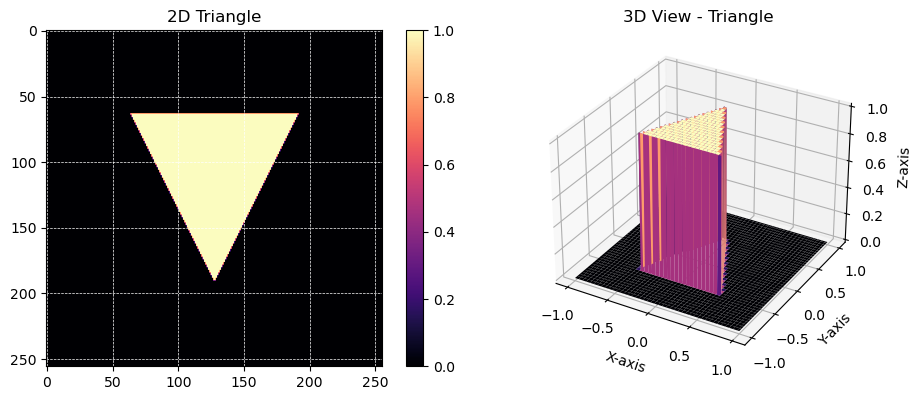

In [4]:

fig = plt.figure(figsize=(10, 4), dpi=100)

plt.subplot(121)
plt.imshow(A, cmap="magma")
plt.title("2D Triangle")
plt.colorbar()  # Add colorbar to check pixel values
plt.grid(color='white', linestyle='--', linewidth=0.5)  # Add grid


# 3D view
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, A, cmap="magma")

ax.set_title("3D View - Triangle")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.grid(True)  # Add grid in 3D view


plt.tight_layout()  # optimize space usage
plt.show()



Before creating the image heatmap and 3D view for each frequency we were instructed to create an image heatmap and 3D view of a certain shape. In here I chose a triangle.

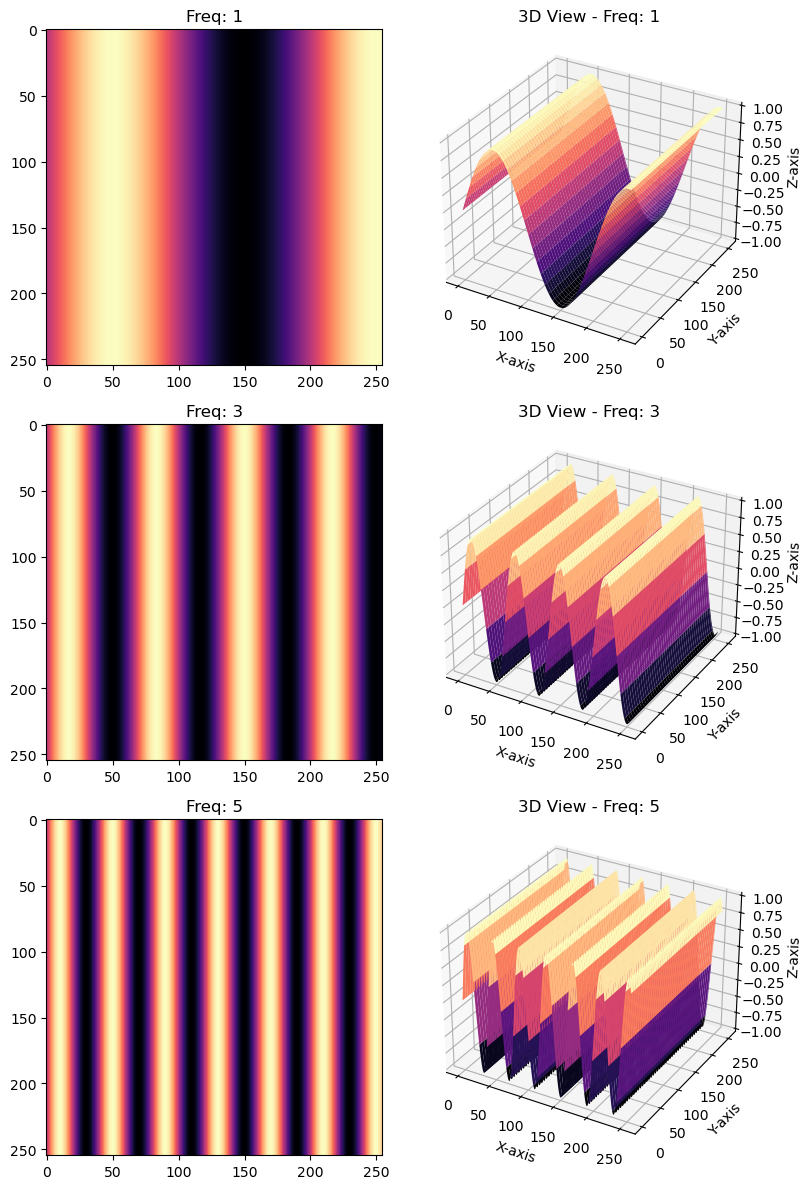

In [5]:

fig = plt.figure(figsize =(8,12),dpi=100)
x = np.arange(0, 255, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200

frequencies = [1, 3, 5]

for idx, freq in enumerate(frequencies, start=1):
    grating = np.sin(2 * freq * np.pi * X / wavelength)

    # 2D view
    ax = fig.add_subplot(3, 2, 2*idx-1)
    ax.imshow(grating, cmap="magma")
    ax.set_title(f"Freq: {freq}")

    # 3D view
    ax = fig.add_subplot(3, 2, 2*idx, projection='3d')
    ax.plot_surface(X, Y, grating, cmap="magma")
    ax.set_title(f"3D View - Freq: {freq}")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.grid(True)

plt.tight_layout()  # optimize space usage
plt.show()

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

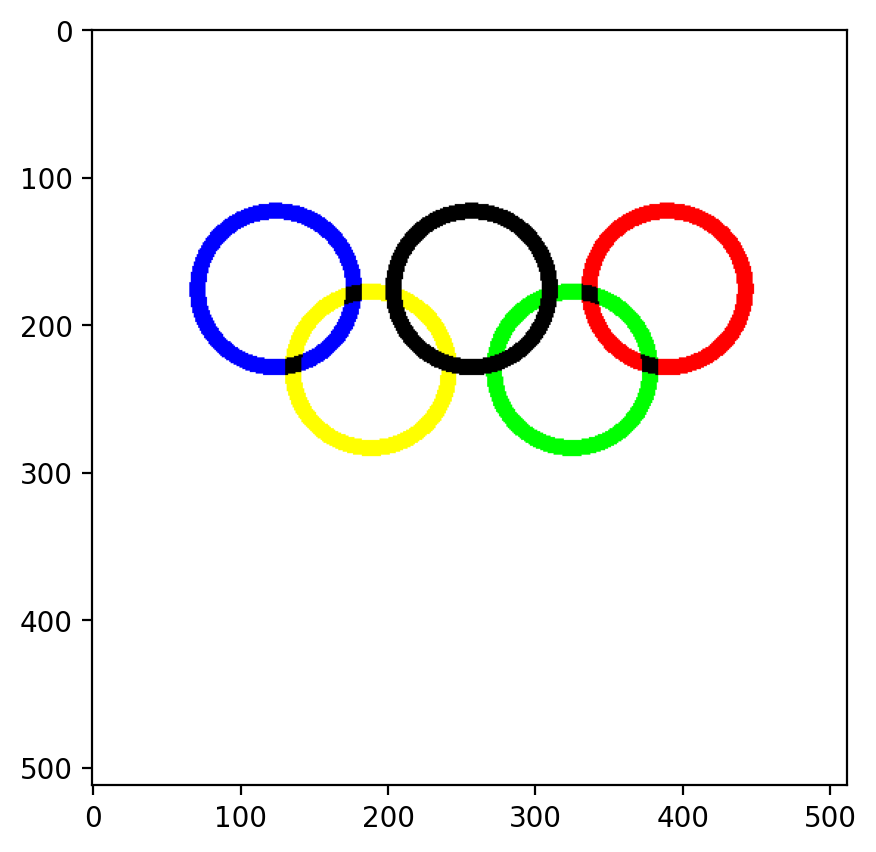

In [11]:
# Define the number of points along x and create a meshgrid
N = 512
x = np.linspace(-15, 20, num = N)
y = x
X, Y = np.meshgrid(x, y)
inner = 3.25 ## in this part of the code I set the value for the radius of the hole
##I needed to set a radius for the hole in order to create the annular

# Initialize arrays for red, green, and blue channels
Rd, Gn, Bl = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N))

# Draw colored circles
Rt, Rc, deg = 3, 4, 30

# Calculate the coordinates of the center of the colored circles
xt, yt = Rt * np.cos(deg * np.pi / 180), Rt * np.sin(deg * np.pi / 180)

# Calculate the distance from each point to the center of each circle and set color channels
##for the red circle
R = np.sqrt((X-4.5*xt) ** 2 + (Y + Rt) ** 2)
annulus = np.zeros(np.shape(R))
Bl[np.where((R < Rc)& (R > inner))] = 1.0
Gn[np.where((R < Rc)& (R > inner))] = 1.0

##for the green circle
R = np.sqrt((X - 2.80*xt) ** 2 + (Y - 0.5* yt) ** 2)
Rd[np.where((R < Rc)& (R > inner))] = 1.0
Bl[np.where((R < Rc)& (R > inner))] = 1.0

##for the yellow circle
R = np.sqrt((X +0.80*xt) ** 2 + (Y -0.5* yt) ** 2)
Bl[np.where((R < Rc) & (R > inner))] = 1.0

##circle for the black circle
R = np.sqrt((X -1*xt) ** 2 + (Y +2*yt) ** 2)
Rd[np.where((R < Rc) & (R > inner))] = 1.0
Bl[np.where((R < Rc) & (R > inner))] = 1.0
Gn[np.where((R < Rc) & (R > inner))] = 1.0


##We overlap this circles to create a blue circle
R = np.sqrt((X +2.5* xt) ** 2 + (Y + 2*yt) ** 2)
Gn[np.where((R < Rc) & (R > inner))] = 1.0
Rd[np.where((R < Rc) & (R > inner))] = 1.0

# Create a 3D array to represent the RGB image
I_rgb = np.ones((N, N, 3))
I_rgb[..., 0] -= Rd
I_rgb[..., 1] -= Gn
I_rgb[..., 2] -= Bl

# Plot the RGB image
plt.figure(figsize=(5,5), dpi=200)
plt.imshow(I_rgb)



In order to create the olympic rings we made use of color subtraction, so what I basically did is I stacked certain colors in orde rto create the desired color. For example for the black circle i stacked the blue, red, and green colors in order for them to cancel out each other, which then forms the black color. I basically just manipulated the coordinates for each circle to move them around

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

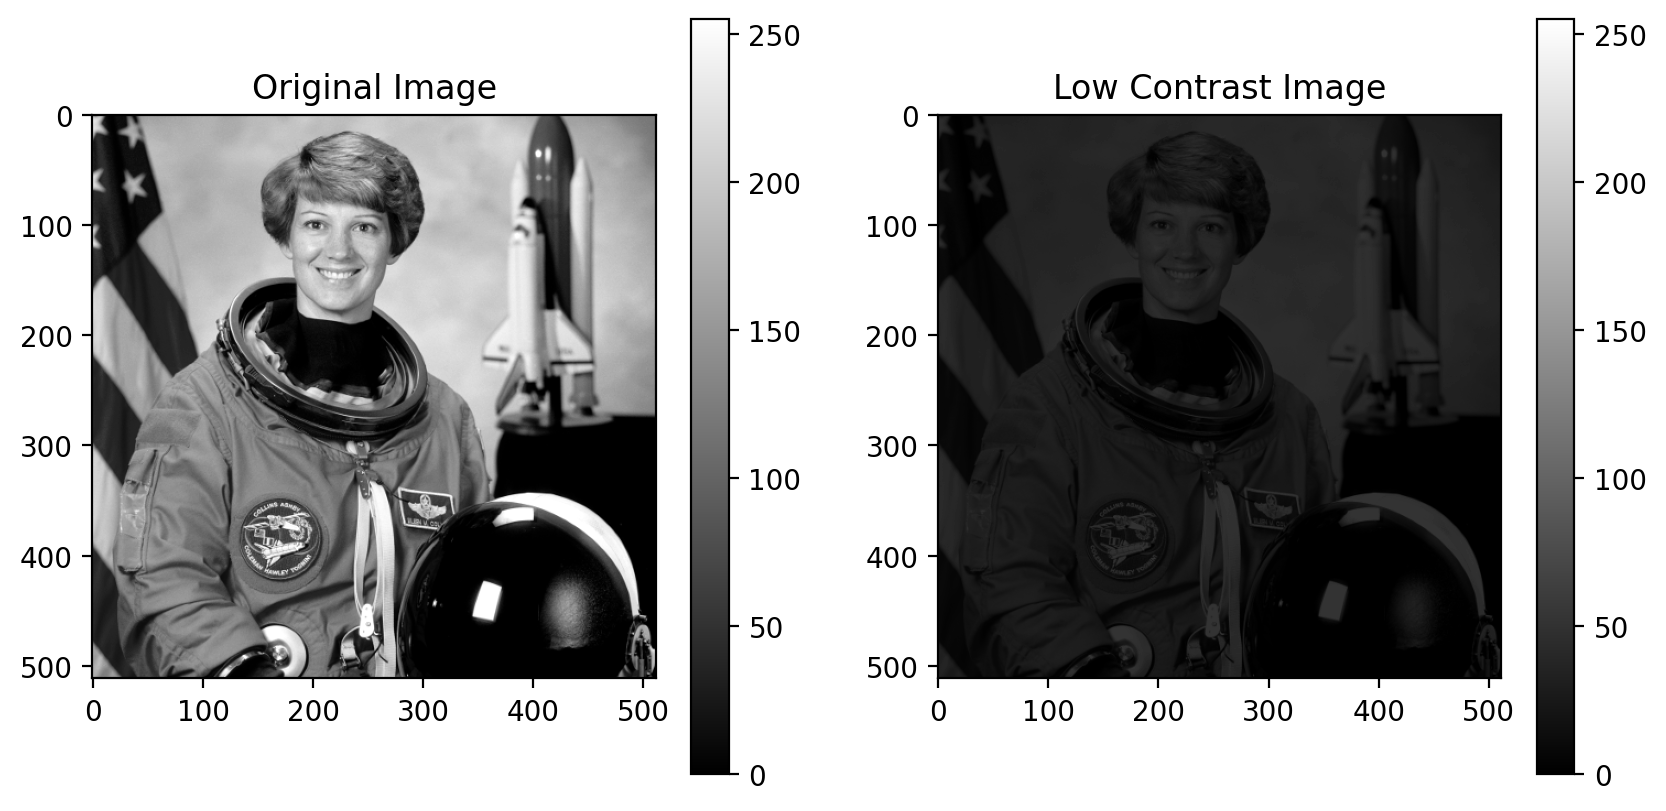

In [12]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.title("Low Contrast Image")
plt.colorbar()

In [13]:
plt.imsave("Astronaut.png", img)

215

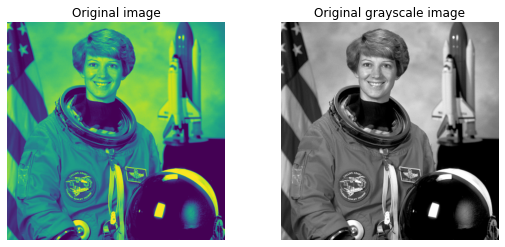

In [14]:
origimg = mpimg.imread("Astronaut.png") # to open astronaut image
img = Image.open("Astronaut.png")
grayimg = np.array(img.convert("L"))

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].imshow(origimg)
ax[0].set_title(r"Original image")
ax[0].axis("off")
ax[1].imshow(grayimg, cmap = "gray")
ax[1].set_title(r"Original grayscale image")
ax[1].axis("off")

plt.imsave("original grayscale pic.png", grayimg, cmap = "gray")
grayimg.max()

### Histogram Backprojection on Grayscale Images - Linear CDF
The corresponding PDF and CDF of our original grayscale image above is shown below for reference.

Text(0.5, 0, 'Gray number')

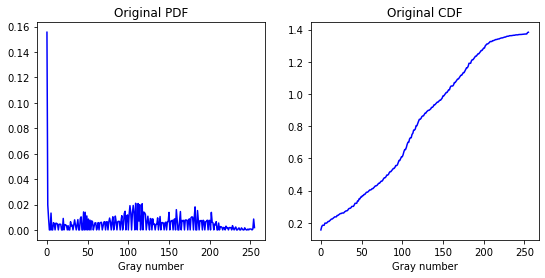

In [15]:
PDF_hist, PDF_edge = np.histogram(grayimg, 256, density = True)
CDF = np.cumsum(PDF_hist)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].plot(PDF_hist, color = "blue")
ax[0].set_title(r"Original PDF")
ax[0].set_xlabel(r"Gray number")
ax[1].plot(CDF, color = "blue")
ax[1].set_title(r"Original CDF")
ax[1].set_xlabel(r"Gray number")

Applying the histogram back projection technique

255

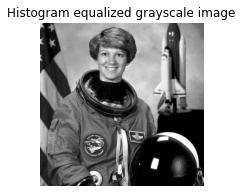

In [16]:
gray_array = grayimg.flatten() # flattens your img to 1D array - concantenation

linear_CDF = np.arange(0, 256, 1)
desired_CDF = linear_CDF/256
new_gray = np.interp(CDF[gray_array], linear_CDF, desired_CDF)
new_grayimg = np.reshape(new_gray, np.shape(grayimg))
# plt.imshow(new_grayimg, cmap = "gray")
# plt.title(r"Linearized grayscale image")
plt.imsave("HM_linear.png", new_grayimg, cmap = "gray")


# Normalizing the image gray number from 0 to 255
manipulated_astro = Image.open("HM_linear.png")
manipulated_astro_gray = np.array(manipulated_astro.convert("L"))

plt.figure(figsize = (6, 3))
plt.imshow(manipulated_astro_gray, cmap = "gray")
plt.title(r"Histogram equalized grayscale image")
plt.axis("off")
manipulated_astro_gray.max()

Comparing the PDF and CDF of the new grayscale image from the original gray image

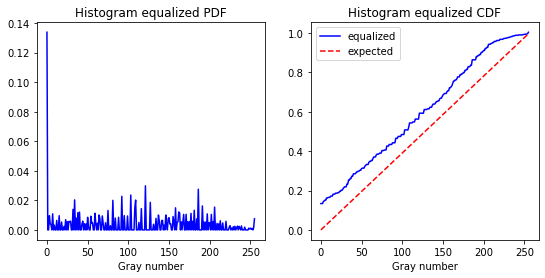

In [17]:
newPDF_hist, newPDF_edge = np.histogram(manipulated_astro_gray, 256, density = True)
newCDF = np.cumsum(newPDF_hist)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].plot(newPDF_hist, color = "blue")
ax[0].set_title(r"Histogram equalized PDF")
ax[0].set_xlabel(r"Gray number")
ax[1].plot(newCDF, color = "blue", label = "equalized")
ax[1].plot(np.arange(0, 256, 1)/256, color = "red", linestyle = "--", label = "expected")
ax[1].set_title(r"Histogram equalized CDF")
ax[1].set_xlabel(r"Gray number")
ax[1].legend()

### Histogram Backprojection on grayscale images - Non-Linear CDF

In [18]:
domain = np.arange(0, 256)

def sigmoid(x, curve = 0.05, center = np.median(domain)):
    a, b = curve, center
    function = 1/(1 + np.exp(-a*(x-b)))
    return function

255

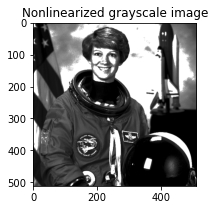

In [19]:
sigmoid_CDF = sigmoid(domain)
desired_sigCDF = sigmoid(domain/256) # not sigmoid_CDF/256
new_gray_sig = np.interp(CDF[gray_array], sigmoid_CDF, desired_sigCDF)
new_grayimg_sig = np.reshape(new_gray_sig, np.shape(grayimg))

plt.imsave("HM_sigmoid.png", new_grayimg_sig, cmap = "gray")


# Normalizing the image gray number from 0 to 255
manipulated_astro_gray2 = Image.open("HM_sigmoid.png")
manipulated_astro_gray_sig = np.array(manipulated_astro_gray2.convert("L"))

plt.figure(figsize = (6, 3))
plt.imshow(manipulated_astro_gray_sig, cmap = "gray")
plt.title(r"Nonlinearized grayscale image")
manipulated_astro_gray_sig.max()

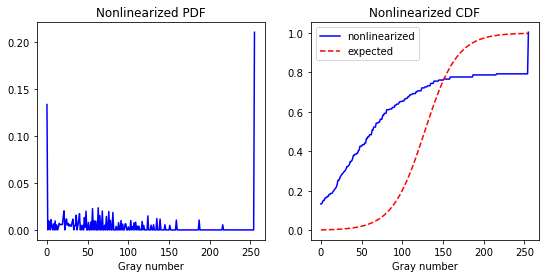

In [20]:
sig_newPDF_hist, sig_newPDF_edge = np.histogram(manipulated_astro_gray_sig, 256, density = True)
sig_newCDF = np.cumsum(sig_newPDF_hist)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].plot(sig_newPDF_hist, color = "blue")
ax[0].set_title(r"Nonlinearized PDF")
ax[0].set_xlabel(r"Gray number")
ax[1].plot(sig_newCDF, color = "blue", label = "nonlinearized")
ax[1].plot(sigmoid(domain), color = "red", linestyle = "--", label = "expected")
ax[1].set_title(r"Nonlinearized CDF")
ax[1].set_xlabel(r"Gray number")
ax[1].legend()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

In [21]:
def contrast_stretch(img):
    grayimg_stretch = (img - img.min())/(img.max() - img.min())
    return grayimg_stretch

215

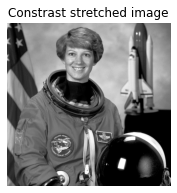

In [22]:
grayimg_stretch = contrast_stretch(grayimg)
plt.imsave("Astro_stretched.png", grayimg_stretch, cmap = "gray")

# Normalizing the image gray number from 0 to 255
astro_img = Image.open("Astro_stretched.png")
astro_grayimg = np.array(img.convert("L"))
plt.figure(figsize = (6, 3))
plt.imshow(astro_grayimg, cmap = "gray")
plt.title(r"Constrast stretched image")
plt.axis("off")
astro_grayimg.max()

Text(0.5, 0, 'Gray number')

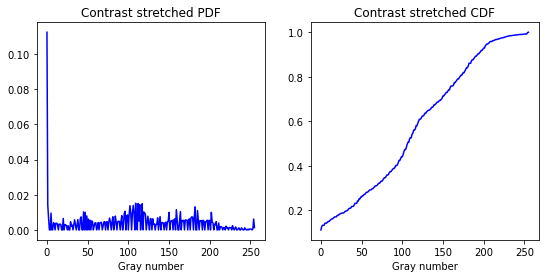

In [23]:
csnewPDF_hist, csnewPDF_edge = np.histogram(grayimg_stretch, 256, density = True)
csnewCDF = np.cumsum(csnewPDF_hist)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].plot(csnewPDF_hist/256, color = "blue")
ax[0].set_title(r"Contrast stretched PDF")
ax[0].set_xlabel(r"Gray number")
ax[1].plot(csnewCDF/256, color = "blue")
ax[1].set_title(r"Contrast stretched CDF")
ax[1].set_xlabel(r"Gray number")

As observed on the prodcued PDF and CDF of the contrast stretched image. It can be observed that there are no changes from the original grayscale image as the normalization equation does not alter the image matrix.

To better see, we can use other images to do image enhancing

## Appying image enhancement on my own image



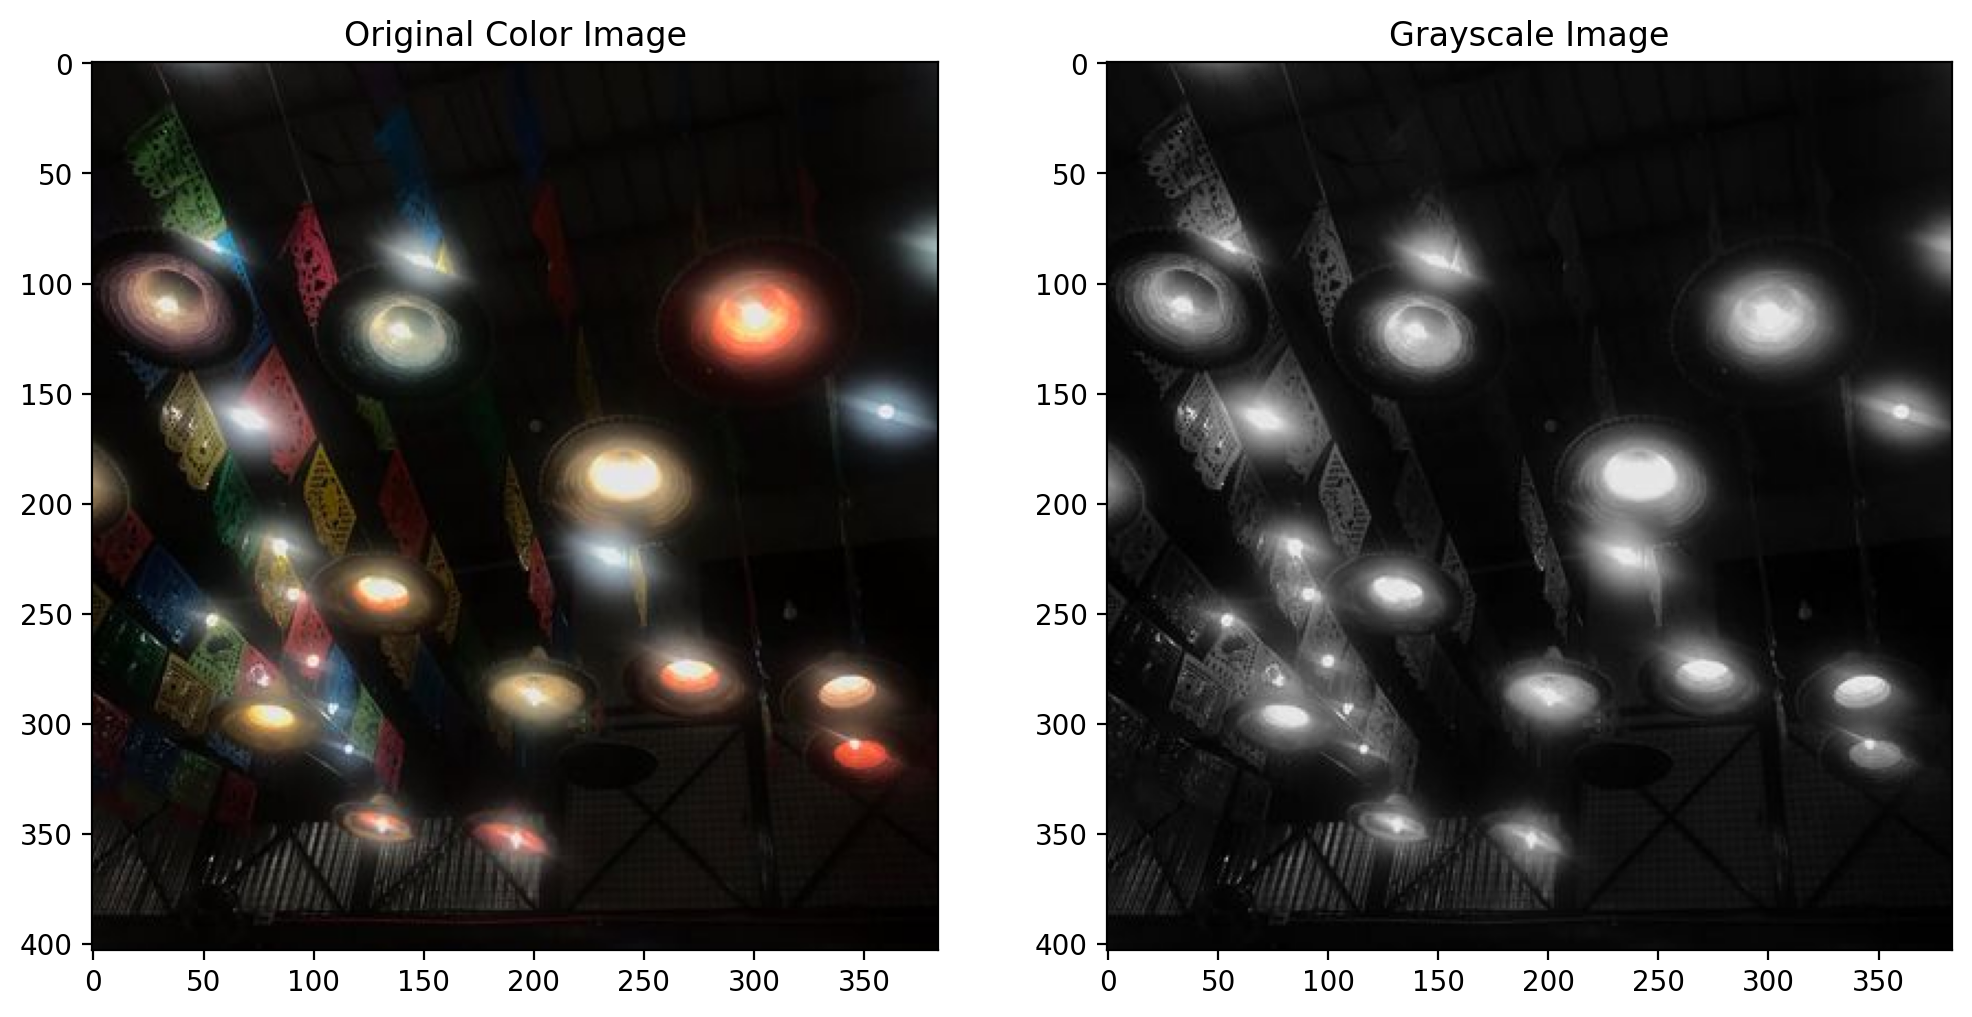

In [29]:
import cv2
# Read the image - PNG file manually uploaded to working folder
img = cv2.imread('Spice_Jar.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plot the original color image and grayscale image side by side
plt.figure(figsize=[12, 6], dpi=200)

# Subplot for the original color image
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, ::-1])  # Display in RGB format
plt.title('Original Color Image')

# Subplot for the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)  # Display in grayscale
plt.title('Grayscale Image')

# Display the plot
plt.show()

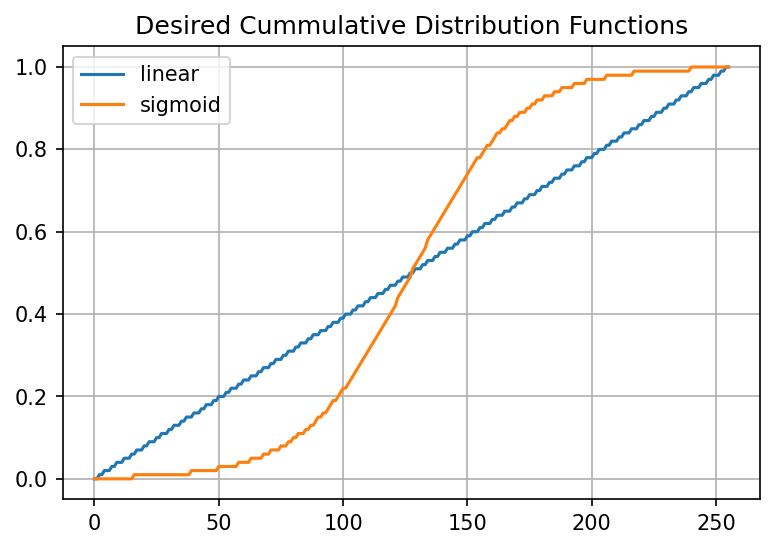

In [30]:
# Generate a linear cumulative distribution function (CDF) array
cdf_line = np.round(np.linspace(0, 1, 256), 2)

# Generate a CDF array using the sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
cdf_sig = np.round(sigmoid(np.linspace(-6, 6, 256)), 2)

plt.figure(dpi = 150)
plt.grid()
plt.title('Desired Cummulative Distribution Functions')
plt.plot(cdf_line, label = 'linear')
plt.plot(cdf_sig, label = 'sigmoid')
plt.legend()

In [31]:
def backprojection(gray_value, cdf_desired, cdf_normalized):
    # Get the T_r value from the normalized CDF
    T_r = cdf_normalized[gray_value]

    # Find the nearest value in the desired CDF to the rounded T_r value
    nearest_index = np.argmin(np.abs(cdf_desired - np.round(T_r, 2)))
    new_gray_value = nearest_index
    
    return new_gray_value

In [32]:
def histogram_back_projection(gray, cdf_desired):


    # Initialize back-projection image
    hbj = np.zeros_like(gray)

    # Compute histogram and CDF of original image
    hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()

    # Apply back-projection to each pixel in the image
    for i in range(np.shape(hbj)[0]):
        for j in range(np.shape(hbj)[1]):
            gray_value = gray[i][j]
            hbj[i][j] = backprojection(gray_value, cdf_desired, cdf_normalized)

    # Compute histogram and CDF of histogram-manipulated image
    hist_, bins_ = np.histogram(hbj.flatten(), 256, [0, 256])
    cdf_ = hist_.cumsum()
    cdf_normalized_ = cdf_ / cdf_.max()

    # Plot Original and Histogram Manipulated Images
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
    ax[0].imshow(gray, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title('Original')
    ax[1].imshow(hbj, cmap='gray', vmin=0, vmax=255)
    ax[1].set_title('Histogram Manipulated')
    plt.tight_layout()
    plt.show()

    # Plot Probability Distribution Function (PDF) and Cumulative Distribution Function (CDF)
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
    ax[0].set_title('Probability Distribution Function')
    ax[0].hist(gray.flatten(), 256, [0, 256], color='r')
    ax[0].hist(hbj.flatten(), 256, [0, 256], color='b')
    ax[0].set_xlabel("Gray Value")
    ax[0].legend(('Original', 'Histogram Manipulated'))

    ax[1].set_title('Cumulative Distribution Function')
    ax[1].plot(cdf_normalized, 'r')
    ax[1].plot(cdf_normalized_, 'b')
    ax[1].set_xlabel("Gray Value")
    ax[1].legend(('Original', 'Histogram Manipulated'))
    plt.tight_layout()
    plt.show()
    plt.tight_layout()  # optimize space usage

### Apply to image with desired linear CDF

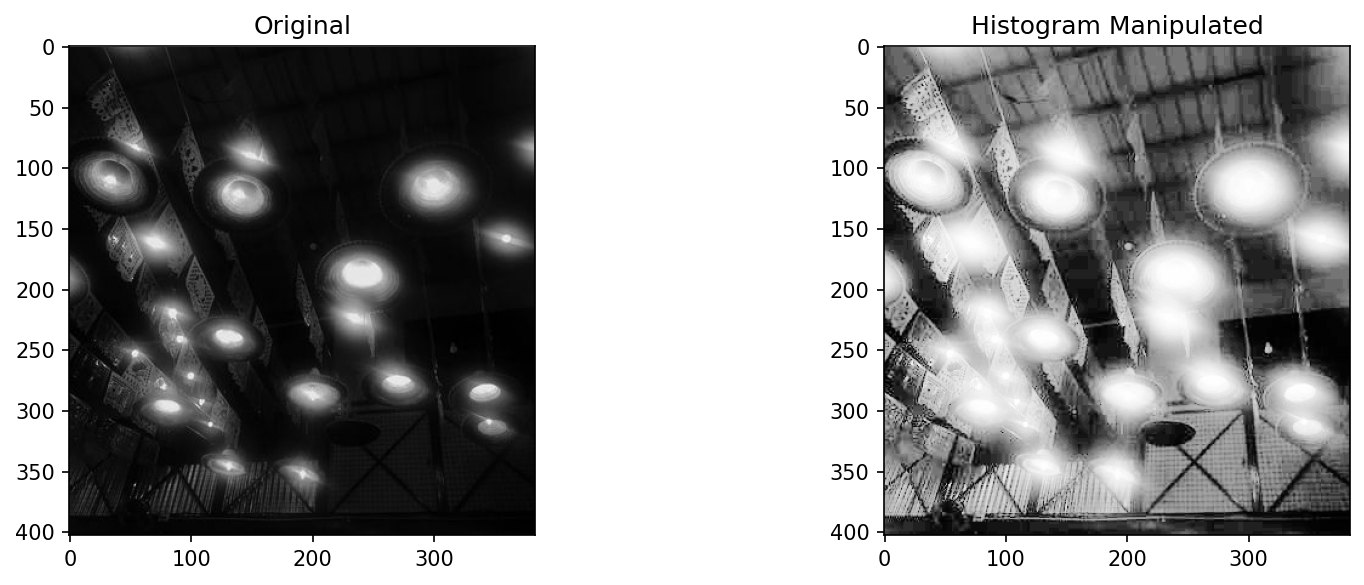

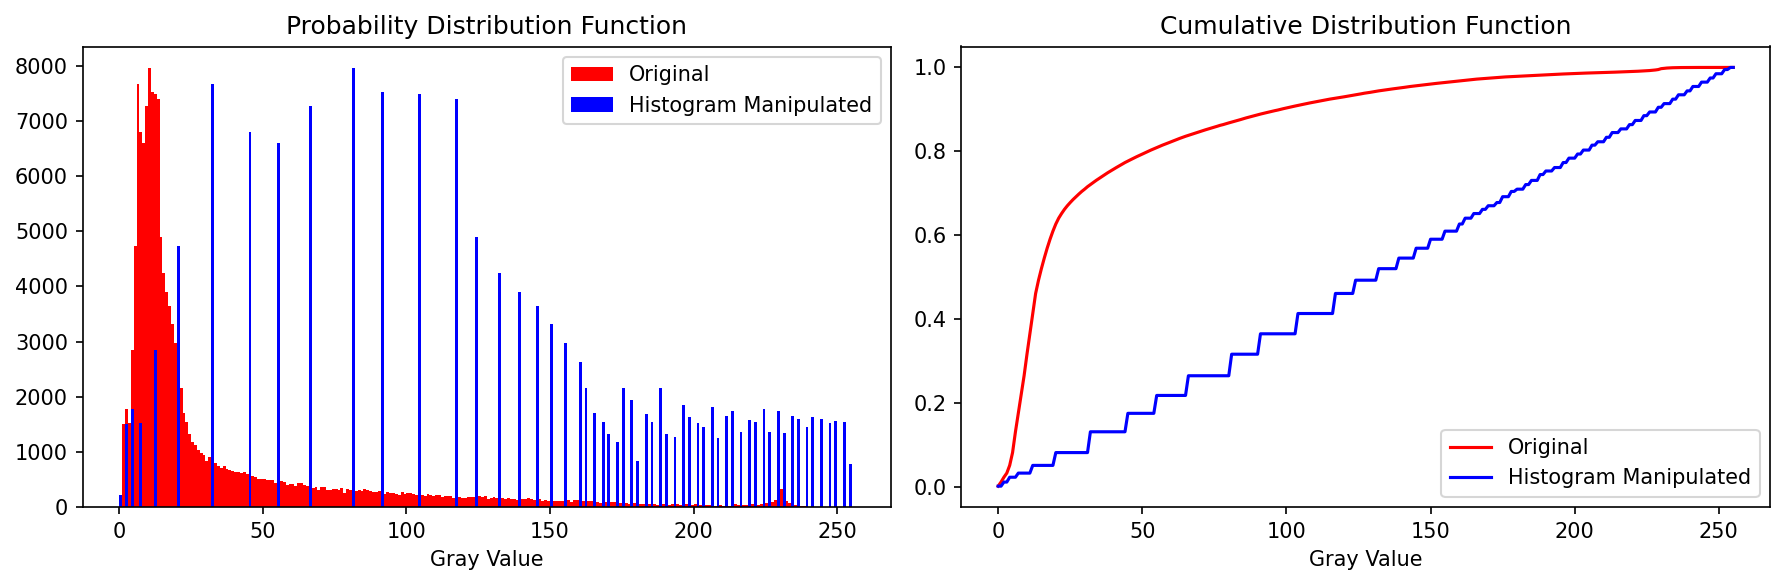

<Figure size 432x288 with 0 Axes>

In [33]:
histogram_back_projection(gray, cdf_line)

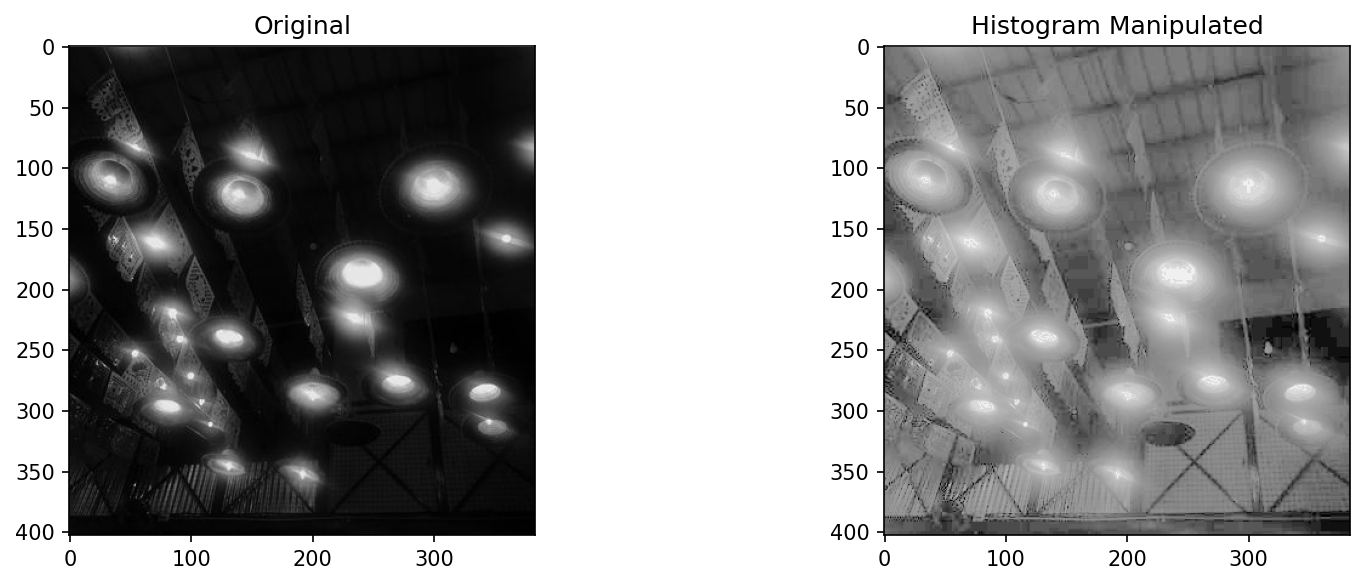

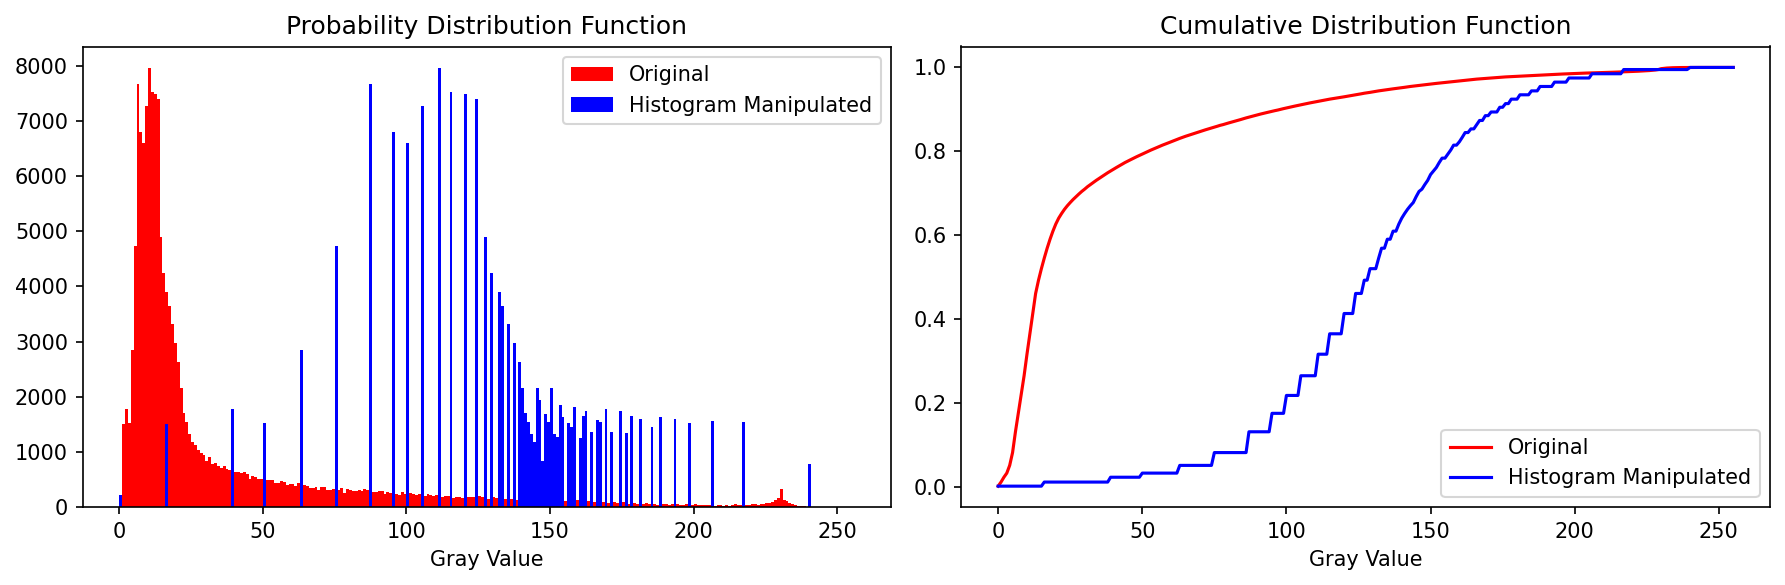

<Figure size 432x288 with 0 Axes>

In [34]:
histogram_back_projection(gray, cdf_sig)

Now as seen above we have different version of the image that we tried to manipulate.We used a linear CDf and sigmoid CDf. From this we can finally see the details of the roof. The manipulated images created by the two different cdf's both achieved the desired output. Comparing the two thw linear CDF showed a harsher version of the manipulated image where dark areas are really dark, while the sigmoid CDf was able to enhance the original image by making the image bright and by doing so we were able to see the details more. Since the original image has a complex contrast distribution it is very obvious that the sigmoid CDF was the better CDF in enhancing the image. 